In [30]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the dataset
file_path = r'C:\Platform_bases_computing\Final_project\Exasens.csv'  # Use raw string to avoid escape issues
data_raw = pd.read_csv(file_path)

# Display the first few rows to inspect
print(data_raw.head())

# Reload the dataset using the correct header row
data_corrected = pd.read_csv(file_path, header=1)

# Inspect the first few rows
print(data_corrected.head())
print("Columns in the dataset:", data_corrected.columns)

# Drop irrelevant rows or columns if necessary
data_corrected = data_corrected.dropna(how="all")  # Drop rows where all values are NaN
data_corrected = data_corrected.drop(columns=["Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12"], errors='ignore')

# Rename columns for clarity
data_corrected.columns = [
    "Diagnosis", "ID", "Imaginary min", "Imaginary avg", 
    "Real min", "Real avg", "Gender", "Age", "Smoking"
]

# Inspect the cleaned dataset
print(data_corrected.head())

# Remove any leading/trailing whitespace in column values
data_corrected = data_corrected.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Separate features and labels
X = data_corrected[["Imaginary min", "Imaginary avg", "Real min", "Real avg", "Gender", "Age", "Smoking"]]
y = data_corrected["Diagnosis"]

# Convert features to numeric and handle missing values if necessary
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean())

# Encode labels if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inspect the splits
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

# Use GridSearchCV to find the best hyperparameters for KNN
param_grid = {'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_k = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']
print(f"Best k value: {best_k}, Best weights: {best_weights}")

# Fit the KNN model with the best parameters
knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Test Accuracy: {accuracy:.2f}")

# Save the trained model to a file
training_KNN = 'knn_model_exasens.pkl'
joblib.dump(knn, training_KNN)
print(f"Model saved to {training_KNN}")


  Diagnosis     ID Imaginary Part    Unnamed: 3 Real Part    Unnamed: 5  \
0       NaN    NaN            NaN           NaN       NaN           NaN   
1       NaN    NaN           Min          Avg.       Min          Avg.    
2      COPD  301-4        -320.61  -300.5635307   -495.26  -464.1719907   
3      COPD  302-3        -325.39  -314.7503595   -473.73  -469.2631404   
4      COPD  303-3           -323  -317.4360556   -476.12  -471.8976667   

   Gender   Age  Smoking  Unnamed: 9  Unnamed: 10 Unnamed: 11      Unnamed: 12  
0     NaN   NaN      NaN         NaN          NaN         NaN              NaN  
1     NaN   NaN      NaN         NaN          NaN     Gender           Somking  
2     1.0  77.0      2.0         NaN          NaN      Male=1     Non-smoker=1  
3     0.0  72.0      2.0         NaN          NaN    Female=0      Ex-smoker=2  
4     1.0  73.0      3.0         NaN          NaN         NaN  Active-smoker=3  
  Unnamed: 0 Unnamed: 1 Unnamed: 2    Unnamed: 3 Unnamed: 4    

C:\Users\phang\AppData\Local\Temp\ipykernel_16020\2699128002.py:39: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_corrected = data_corrected.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Best k value: 4, Best weights: distance
KNN Test Accuracy: 0.86
Model saved to knn_model_exasens.pkl



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         9
           2       0.78      0.88      0.82         8
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         1

    accuracy                           0.86        21
   macro avg       0.56      0.57      0.56        21
weighted avg       0.82      0.86      0.84        21



c:\Users\phang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\phang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\phang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

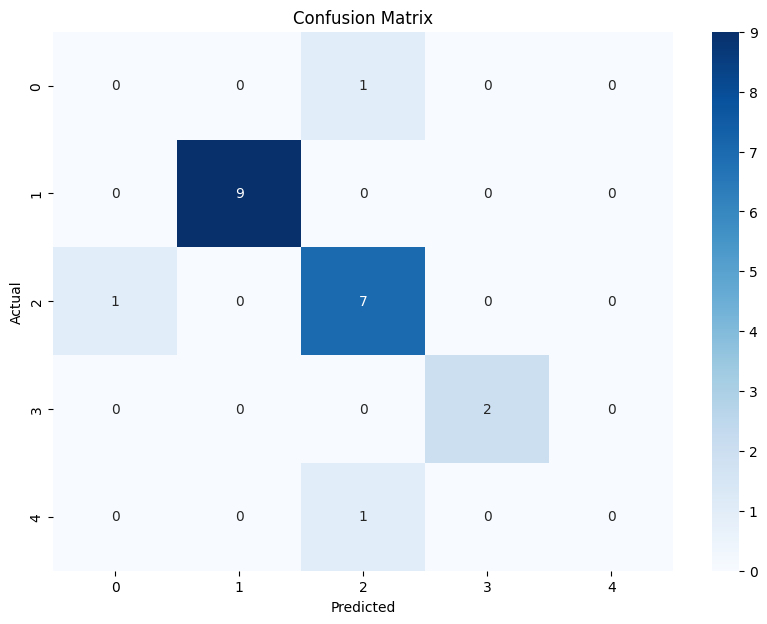

In [31]:
# Generate and display a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and display a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [34]:
# Save the trained model, scaler, and label encoder to files
model_filename = 'knn_model_exasens.pkl'
scaler_filename = 'scaler.pkl'
label_encoder_filename = 'label_encoder.pkl'
joblib.dump(knn, model_filename)
joblib.dump(scaler, scaler_filename)
joblib.dump(label_encoder, label_encoder_filename)


# Load the model and make predictions on a new dataset
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)
loaded_label_encoder = joblib.load(label_encoder_filename)

new_data_path = r'C:\Platform_bases_computing\Final_project\New_Exasens_Data.csv'
new_data = pd.read_csv(new_data_path, header=2)  # Load new data starting from the correct row

# Rename columns to match the expected format
new_data.columns = [
    "Diagnosis", "ID", "Imaginary min", "Imaginary avg", 
    "Real min", "Real avg", "Gender", "Age", "Smoking"
]

# Drop unnecessary columns like Diagnosis and ID
new_data = new_data.drop(columns=["Diagnosis", "ID"])

# Convert features to numeric
new_data = new_data.apply(pd.to_numeric, errors='coerce')

# Fill missing values with the column mean
new_data = new_data.fillna(new_data.mean())

# Scale the features using the previously fitted scaler
new_data_scaled = loaded_scaler.transform(new_data)

# Make predictions on the new data
new_predictions = loaded_model.predict(new_data_scaled)

# Convert the numeric predictions back to original labels
new_predictions_labels = loaded_label_encoder.inverse_transform(new_predictions)

# Display predictions
print("Predictions for the new dataset:")
print(new_predictions_labels)


Predictions for the new dataset:
['HC' 'COPD' 'Infected' 'COPD']
